# Training

based on: https://medium.com/geekculture/simple-chatbot-using-bert-and-pytorch-part-1-2735643e0baa

In [2]:
import numpy as np
import pandas as pd
import re
import torch
import random
import torch.nn as nn
import transformers
import matplotlib.pyplot as plt
# specify GPU
device = torch.device("cuda")

c:\Users\Andrea FS\OneDrive\Lambton college\second term\new_nlp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.Data preparation
Put Q-A in a dataframe

### Creation of the dataframe

In [5]:
import pandas as pd

data = [
    ("What was Canadian Tire's diluted EPS in Q3 2024?", "$3.59"),
    ("What was Canadian Tire's normalized EPS in Q3 2024?", "$2.96"),
    ("What was the percentage decrease in consolidated comparable sales in Q3 2024?", "1.5%"),
    ("What was Canadian Tire's annual dividend in 2024?", "$7.10 per share"),
    ("What was the increase in loyalty engagement in Q3 2024?", "4%"),
    ("What was Canadian Tire's revenue in Q3 2024?", "$4,192.9 million"),
    ("What was Canadian Tire's revenue excluding petroleum in Q3 2024?", "$3,639.8 million"),
    ("What was the financial services segment IBT in Q3 2024?", "$110.3 million"),
    ("What percentage increase was observed in GAAR in Q3 2024?", "3.0%"),
    ("How many Party City stores were added in Q3 2024?", "Four"),
    ("How many CTR store refresh projects are expected to be completed by the end of 2024?", "39"),
    ("What is the expected range for 2025 operating capital expenditures?", "$525 million to $575 million"),
    ("What was the retail segment IBT in Q3 2024?", "$164.8 million"),
    ("What percentage decrease was observed in Mark’s retail sales in Q3 2024?", "2.0%"),
    ("What was the consolidated income before taxes in Q3 2024?", "$299.3 million"),
    ("What percentage of Canadian Tire stores are expected to have technology enhancements by year-end 2024?", "More than 90%"),
    ("What technology enhancements are being deployed in Canadian Tire stores?", "Electronic shelf labels and lockers"),
    ("What is the expected gross leasable area from CT REIT's new investments?", "Approximately 283,000 square feet"),
    ("What was the retail gross margin rate excluding petroleum in Q3 2024?", "35.7%"),
    ("What was Canadian Tire’s operating capital expenditures in Q3 2024?", "$127.1 million"),
    ("How many retail locations will have enhanced broadband capabilities by the end of 2024?", "More than 60%"),
    ("What was the diluted adjusted funds from operations per unit for CT REIT in Q3 2024?", "$0.339"),
    ("What was the reported normalized net income attributable to shareholders in Q3 2024?", "$200.6 million"),
    ("What caused a $0.41 EPS impact in Q3 2024?", "A property sale gain and insurance recoveries"),
    ("What was the revenue decrease percentage for Helly Hansen in Q3 2024?", "6.0%"),
    ("What is the dividend declared per share for March 2025?", "$1.775 per share"),
    ("What was the key factor driving higher customer sentiment in Q3 2024?", "Improved in-store Net Promoter Score (NPS)"),
    ("What strategic change improved supply chain productivity?", "Goods-to-person automation in Calgary and Montreal distribution centers"),
    ("What is Canadian Tire's main operating capital expenditure priority for 2025?", "New Vancouver Distribution Center and transportation management system rollout"),
    ("What non-GAAP measure reconciles normalized income before taxes?", "Normalized Income Before Income Taxes"),
    ("Where is Canadian Tire Corporation headquartered?", "Toronto, Canada"),
    ("When did Canadian Tire release its Q3 2024 results?", "November 7, 2024"),
    ("What was the revenue excluding petroleum for Q3 2024?", "$3,639.8 million"),
    ("Who is the President and CEO of Canadian Tire Corporation?", "Greg Hicks"),
    ("When is the next dividend payable date for Canadian Tire shareholders?", "March 1, 2025"),
    ("Was there an increase in consolidated income before income taxes compared to last year?", "Yes, it increased by $230.0 million."),
    ("What percentage of Canadian Tire retail locations will have enhanced broadband by 2024 year-end?", "More than 60%"),
    ("Where were supply chain productivity improvements implemented?", "Calgary and Montreal Distribution Centres"),
    ("What segment showed growth in comparable sales for two consecutive quarters?", "SportChek"),
    ("Was there a decline in retail revenue in Q3 2024 compared to last year?", "Yes, it decreased by 1.8%"),
    ("What category in Mark’s was a top performer in Q3 2024?", "Children’s wear"),
    ("Who are the intended beneficiaries of the dividend increase?", "Shareholders of record as of January 31, 2025"),
    ("When is the expiry date for Canadian Tire's current NCIB program?", "March 1, 2025"),
    ("What event contributed to a $0.41 EPS impact in Q3 2024?", "A property sale gain and insurance recoveries"),
    ("Were active registered loyalty members up in Q3 2024?", "Yes, by 4%"),
    ("What was Canadian Tire's diluted adjusted funds from operations per unit in Q3 2024?", "$0.339"),
    ("When did Canadian Tire's SportChek last show positive comparable sales before Q2 2024?", "Q2 2023"),
    ("Where can the full Q3 2024 MD&A document be accessed?", "SEDAR+ at http://www.sedarplus.ca"),
    ("What segment experienced a 6% decline in revenue in Q3 2024?", "Helly Hansen"),
    ("When was Canadian Tire founded?", "1922"),
    ("Where is Helly Hansen, one of Canadian Tire’s owned brands, based?", "Oslo, Norway"),
    ("What financial measure includes gains from property sales and insurance recoveries?", "Consolidated Income Before Income Taxes"),
    ("Were consolidated comparable sales up or down in Q3 2024?", "Down by 1.5%"),
    ("Where are the new Party City stores located?", "Not specified in the document."),
    ("What contributed to increased customer satisfaction in Q3 2024?", "Better omnichannel experiences and strategic store investments"),
    ("When will Canadian Tire’s new Vancouver Distribution Center open?", "2025"),
    ("What major investments were made to improve in-store customer experience?", "Electronic shelf labels, lockers, and CTR store refresh projects"),
    ("Where is the conference call replay for Q3 2024 available?", "https://investors.canadiantire.ca"),
    ("When was the press release issued regarding Q3 2024 results?", "November 7, 2024"),
    ("Who should media inquiries about Canadian Tire be directed to?", "Stephanie Nadalin"),
    ("Who should investor inquiries about Canadian Tire be directed to?", "Karen Keyes")
]

df = pd.DataFrame(data, columns=["Question", "Answer"])
df


,Question,Answer
0,What was Canadian Tire's diluted EPS in Q3 2024?,$3.59
1,What was Canadian Tire's normalized EPS in Q3 ...,$2.96
2,What was the percentage decrease in consolidat...,1.5%
3,What was Canadian Tire's annual dividend in 2024?,$7.10 per share
4,What was the increase in loyalty engagement in...,4%
...,...,...
56,What major investments were made to improve in...,"Electronic shelf labels, lockers, and CTR stor..."
57,Where is the conference call replay for Q3 202...,https://investors.canadiantire.ca
58,When was the press release issued regarding Q3...,"November 7, 2024"
59,Who should media inquiries about Canadian Tire...,Stephanie Nadalin


### Saving the dataframe

In [6]:
df.to_csv('QA_df.csv', index=False)

## Loading the df

In [76]:
df = pd.read_csv('QA_df.csv')
df.head()

,Question,Answer
0,What was Canadian Tire's diluted EPS in Q3 2024?,$3.59
1,What was Canadian Tire's normalized EPS in Q3 ...,$2.96
2,What was the percentage decrease in consolidat...,1.5%
3,What was Canadian Tire's annual dividend in 2024?,$7.10 per share
4,What was the increase in loyalty engagement in...,4%


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  61 non-null     object
 1   Answer    61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [48]:
# Converting the answers into encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Answer'] = le.fit_transform(df['Answer'])
# check class distribution
df['Answer'].value_counts(normalize = True)

Answer
43    0.032787
37    0.032787
8     0.032787
22    0.032787
0     0.032787
38    0.032787
45    0.016393
33    0.016393
53    0.016393
25    0.016393
48    0.016393
52    0.016393
26    0.016393
47    0.016393
51    0.016393
9     0.016393
50    0.016393
34    0.016393
14    0.016393
44    0.016393
27    0.016393
28    0.016393
42    0.016393
24    0.016393
16    0.016393
30    0.016393
54    0.016393
49    0.016393
46    0.016393
32    0.016393
41    0.016393
15    0.016393
13    0.016393
12    0.016393
20    0.016393
10    0.016393
2     0.016393
17    0.016393
31    0.016393
19    0.016393
11    0.016393
4     0.016393
7     0.016393
40    0.016393
39    0.016393
29    0.016393
23    0.016393
18    0.016393
3     0.016393
6     0.016393
21    0.016393
1     0.016393
35    0.016393
5     0.016393
36    0.016393
Name: proportion, dtype: float64

In [49]:
# In this example we have used all the utterances for training purpose
train_text, train_labels = df["Question"], df["Answer"]

## Model training

### BERT

In [10]:
from transformers import AutoModel, BertTokenizerFast
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
# Import BERT-base pretrained model
bert = AutoModel.from_pretrained("bert-base-uncased")

### ROBERTA

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
# Load the Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
# Import Roberta pretrained model
bert = RobertaModel.from_pretrained("roberta-base")

### DISTILBERT

In [50]:
from transformers import DistilBertTokenizer, DistilBertModel
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [51]:
text = ["   What is Canadian Tire","Canadian Tire Corporation, is a group of companies that includes a Retail segment, a Financial Services division and CT REIT. Our retail business is led by Canadian Tire, which was founded in 1922 and provides Canadians with products for life in Canada across its Living, Playing, Fixing, Automotive and Seasonal & Gardening divisions."]
# Encode the text
encoded_input = tokenizer(text, padding=True,truncation=True, return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101,  2054,  2003,  3010, 12824,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0],
        [  101,  3010, 12824,  3840,  1010,  2003,  1037,  2177,  1997,  3316,
          2008,  2950,  1037,  7027,  6903,  1010,  1037,  3361,  2578,  2407,
          1998, 14931, 24964,  2102,  1012,  2256,  7027,  2449,  2003,  2419,
          2011,  3010, 12824,  1010,  2029,  2001,  2631,  1999,  4798,  1998,
          3640, 16485,  2007,  3688,  2005,  2166,  1999,  2710,  2408,  2049,
          2542,  1010,  2652,  1010, 15887,  1010, 12945,  1998, 12348,  1004,


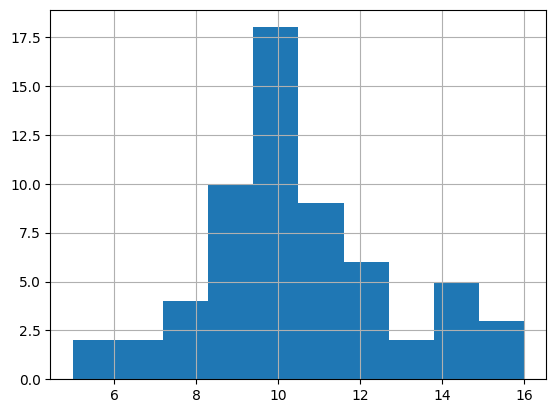

In [52]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 10)
# Based on the histogram we are selecting the max len as 8
max_seq_len = 12

In [53]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

c:\Users\Andrea FS\OneDrive\Lambton college\second term\new_nlp\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [54]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

In [55]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 16
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

### Define Model Architecture

In [56]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,5)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x

In [57]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to GPU
#model = model.to(device)
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linear: 1-4                                           393,728
├─Linear: 1-5                                           131,328
├─Linear: 1-6                                           1,285
├─LogSoftmax: 1-7                                       --
Total 

### Optimizer

In [58]:
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

c:\Users\Andrea FS\OneDrive\Lambton college\second term\new_nlp\.venv\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Find Class Weights

In [59]:
train_labels = train_labels.to_numpy()

In [68]:
class_counts = np.bincount(train_labels)
total_samples = len(train_labels)
class_weights = total_samples / (len(class_counts) * class_counts)

# Convert to tensor
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"Manually Computed Weights: {weights}")


Manually Computed Weights: tensor([0.5545, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 0.5545,
        1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091,
        1.1091, 1.1091, 1.1091, 1.1091, 0.5545, 1.1091, 1.1091, 1.1091, 1.1091,
        1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091,
        1.1091, 0.5545, 0.5545, 1.1091, 1.1091, 1.1091, 1.1091, 0.5545, 1.1091,
        1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091, 1.1091,
        1.1091])


In [70]:
# convert class weights to tensor
weights= torch.tensor(weights,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights) 

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_2520\4216351222.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights= torch.tensor(weights,dtype=torch.float)


# epochs

In [71]:
from torch.optim import lr_scheduler

In [72]:
# empty lists to store training and validation loss of each epoch
train_losses=[]
# number of training epochs
epochs = 200
# We can also use learning rate scheduler to achieve better results
lr_sch = lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

## Train model

In [73]:
device = torch.device("cpu")

In [74]:
def train():
    model.train()
    total_loss = 0
    total_preds = []  # List to save predictions

    for step, batch in enumerate(train_dataloader):
        if step % 50 == 0 and step != 0:
            print(f'Batch {step} of {len(train_dataloader)}.')

        # No need to push to GPU; ensure tensors are already on CPU
        sent_id, mask, labels = batch

        # Forward pass
        preds = model(sent_id, mask)
        loss = cross_entropy(preds, labels)
        total_loss += loss.item()

        # Backward pass
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Optimizer step and clear gradients
        optimizer.step()
        optimizer.zero_grad()

        # Detach predictions and append
        preds = preds.detach().numpy()  # Since we're on CPU, no need for `.cpu()`
        total_preds.append(preds)

    avg_loss = total_loss / len(train_dataloader)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds


In [75]:
for epoch in range(epochs):
    print(f'\n Epoch {epoch + 1} / {epochs}')

    # Train the model
    train_loss, _ = train()

    # Append training loss
    train_losses.append(train_loss)

    # Set deterministic behavior (optional for reproducibility)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

print(f'\nFinal Training Loss: {train_loss:.3f}')



 Epoch 1 / 200


RuntimeError: weight tensor should be defined either for all 5 classes or no classes but got weight tensor of shape: [55]